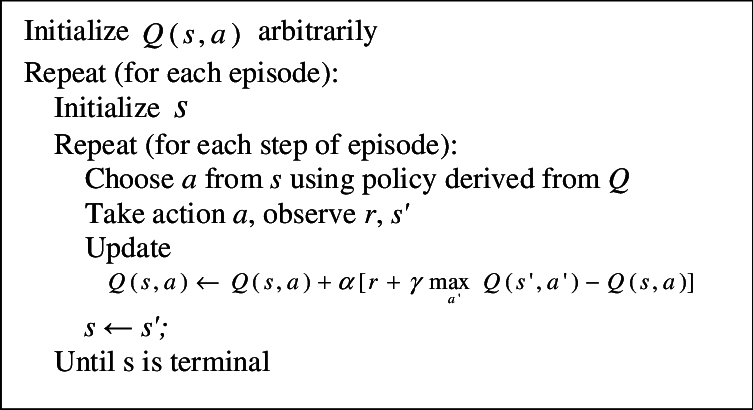

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import comet_ml
from comet_ml.integration.gymnasium import CometLogger

In [ ]:
class LakeSolver:
    def __init__(self, env, episodes = 1000, gamma = 0.9, epsilon = 1, lr = 0.9):
        self.env = env
        self.episodes = episodes
        self.gamma = gamma
        self.epsilon = epsilon
        self.qtable = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.state = self.reset_()
        self.lr = lr
        self.cntr = 0
        self.stop = False
        self.epsilon_decay_rate = 0.0001 

    # step method
    def step_(self):
        rnd = np.random.rand() #prob from uniform
        self.epsilon = max(self.epsilon - self.epsilon_decay_rate, 0)
        if rnd < self.epsilon: 
            action = env.action_space.sample() # random action selection
        else:
            action = np.argmax(self.qtable[self.state,:]) # action follows our polict
            
        next_state, reward, terminate, truncate, _ = self.env.step(action)
        
        self.qtable[self.state,action] = self.qtable[self.state,action] + self.lr * (
                reward + self.gamma * np.max(self.qtable[next_state,:]) - self.qtable[self.state,action]
            )
        self.state = next_state
        self.stop = True if (terminate) or (truncate) else False
        
    # reset method
    def reset_(self):
        self.cntr = 0
        self.stop  = False
        self.state = self.env.reset()[0]
        
    # train
    def train(self):
        for i in range(self.episodes):
            self.reset_()
            while self.stop != True:
                self.step_()
        self.env.close()

In [ ]:
exp = comet_ml.init('qlearning')

env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=True, render_mode = 'human')
experiment = comet_ml.Experiment()
env = CometLogger(env, experiment)

In [ ]:
lk = LakeSolver(env)
lk.train()